1.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

In [ ]:
data_path = os.path.join(os.getcwd(), 'Admission_Predict_A3.csv')
df = pd.read_csv(data_path)

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
print(f'Original DataFrame shape: {df.shape}')

Original DataFrame shape: (500, 9)


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
Q1


,0.25
Serial No.,125.7500
GRE Score,308.0000
TOEFL Score,103.0000
University Rating,2.0000
SOP,2.5000
LOR,3.0000
CGPA,8.1275
Research,0.0000
Chance of Admit,0.6300


In [ ]:
Q3

,0.75
Serial No.,375.25
GRE Score,325.00
TOEFL Score,112.00
University Rating,4.00
SOP,4.00
LOR,4.00
CGPA,9.04
Research,1.00
Chance of Admit,0.82


In [ ]:
IQR

,0
Serial No.,249.5000
GRE Score,17.0000
TOEFL Score,9.0000
University Rating,2.0000
SOP,1.5000
LOR,1.0000
CGPA,0.9125
Research,1.0000
Chance of Admit,0.1900


In [ ]:
print(f'After removing outliers: {df.shape}')

After removing outliers: (497, 9)


2.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features=df.drop(columns=['Chance of Admit '])

In [ ]:
target=df['Chance of Admit ']

In [ ]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

In [ ]:
scaled_df=pd.DataFrame(scaled_features,columns=features.columns)
scaled_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.499732,0.531670,0.544984,0.530684,0.594819,0.569416,0.571261,0.563380
std,0.289715,0.224741,0.215575,0.285201,0.246768,0.262516,0.192746,0.496466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250501,0.360000,0.392857,0.250000,0.375000,0.428571,0.426282,0.000000
50%,0.498998,0.540000,0.535714,0.500000,0.625000,0.571429,0.564103,1.000000
75%,0.749499,0.700000,0.714286,0.750000,0.750000,0.714286,0.717949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaled_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.000000,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0
1,0.002004,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0
2,0.004008,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0
3,0.006012,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0
4,0.008016,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0


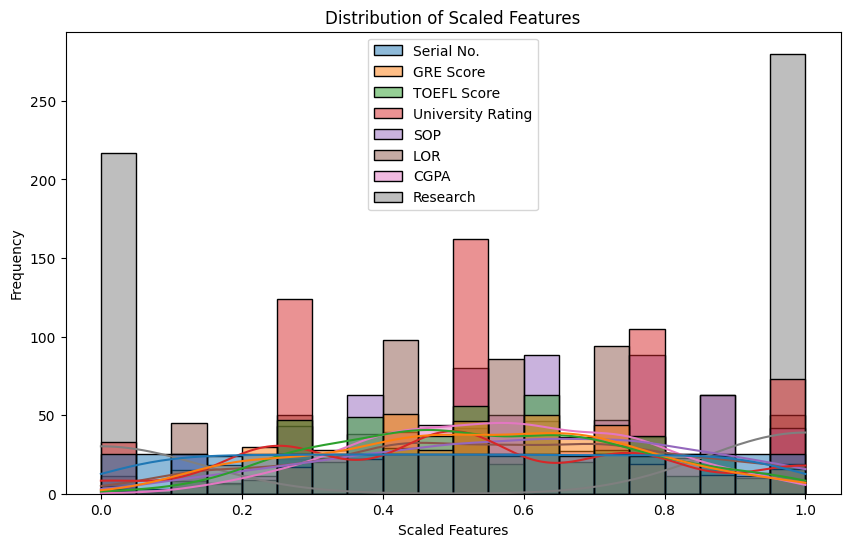

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(scaled_df,kde=True)
plt.title('Distribution of Scaled Features')
plt.xlabel('Scaled Features')
plt.ylabel('Frequency')
plt.show()

3.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import KBinsDiscretizer


In [ ]:
bins = [0.3, 0.5, 0.7, 1.0]  # Define the cutoffs
labels = ['Low', 'Medium', 'High']
df['Admit_Category'] = pd.cut(df['Chance of Admit '], bins=bins, labels=labels)

<ipython-input-21-9845c2b47248>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admit_Category'] = pd.cut(df['Chance of Admit '], bins=bins, labels=labels)


bins = [0, 0.65, 0.8, 1.0] gave better results compared to given bins value in assignment

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit_Category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,High
2,3,316,104,3,3.0,3.5,8.00,1,0.72,High
3,4,322,110,3,3.5,2.5,8.67,1,0.80,High
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Medium


In [ ]:
X = scaled_df.values
y = df['Admit_Category']

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)


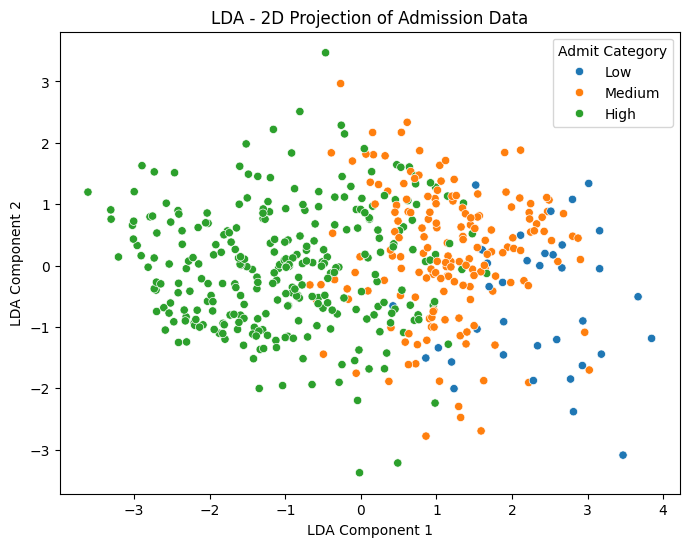

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y)
plt.title('LDA - 2D Projection of Admission Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Admit Category')
plt.show()

4.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, target, test_size=0.2, random_state=42)


In [ ]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

In [ ]:
weights = tf.Variable(tf.random.normal([2, 1]), dtype=tf.float32)  # 2 input features, 1 output
bias = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

In [ ]:
def linear_regression(X):
    return tf.matmul(X, weights) + bias

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.01)

epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_train_tf)
        loss = loss_fn(y_train_tf, y_pred)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.numpy()}')



Epoch 100, Loss: 0.0035474365577101707
Epoch 200, Loss: 0.0034174358006566763
Epoch 300, Loss: 0.0034165182150900364
Epoch 400, Loss: 0.0034165021497756243
Epoch 500, Loss: 0.003416501684114337
Epoch 600, Loss: 0.0034165021497756243
Epoch 700, Loss: 0.0034165019169449806
Epoch 800, Loss: 0.0034165019169449806
Epoch 900, Loss: 0.0034165019169449806
Epoch 1000, Loss: 0.0034165019169449806


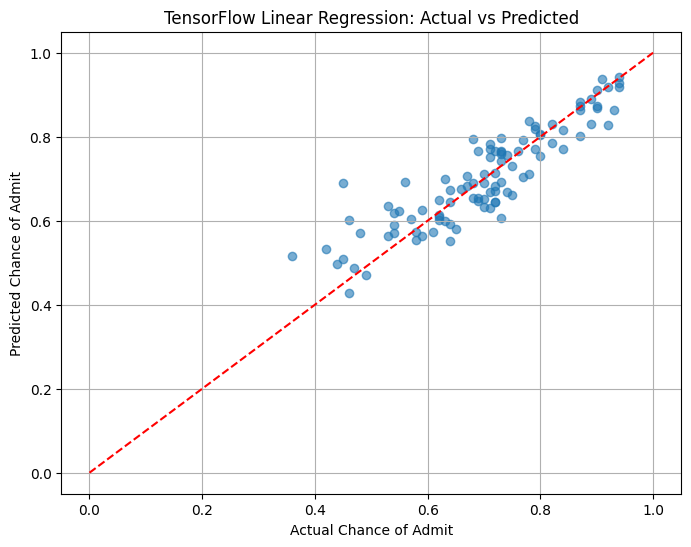

In [ ]:
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_pred_tf = linear_regression(X_test_tf)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tf.numpy(), alpha=0.6)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('TensorFlow Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.show()

scikit learn

Scikit-Learn Linear Regression MSE: 0.0035980879513001275


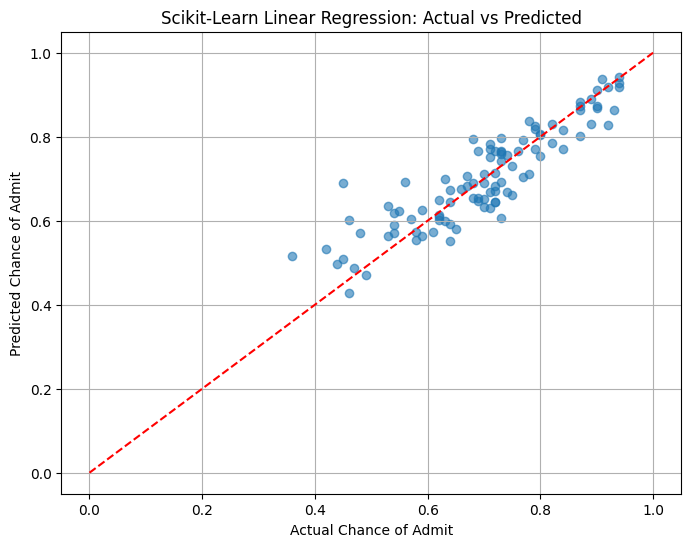

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the LinearRegression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = lin_reg.predict(X_test)

# Calculate Mean Squared Error
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'Scikit-Learn Linear Regression MSE: {mse_sklearn}')

# Visualize the actual vs. predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sklearn, alpha=0.6)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Scikit-Learn Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line
plt.show()

5.


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Admit_Category_Encoded'] = label_encoder.fit_transform(df['Admit_Category'])

X = scaled_df.values  # Use scaled features
y = df['Admit_Category_Encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-32-a0a7c94626b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admit_Category_Encoded'] = label_encoder.fit_transform(df['Admit_Category'])


using tensorflow

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5772 - loss: 0.8452 - val_accuracy: 0.5300 - val_loss: 0.9244
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5757 - loss: 0.8366 - val_accuracy: 0.5300 - val_loss: 0.9170
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5474 - loss: 0.8647 - val_accuracy: 0.5300 - val_loss: 0.9107
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5711 - loss: 0.8393 - val_accuracy: 0.5300 - val_loss: 0.9048
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5794 - loss: 0.8175 - val_accuracy: 0.5300 - val_loss: 0.8992
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5778 - loss: 0.8289 - val_accuracy: 0.5300 - val_loss: 0.8940
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5870 - loss: 0.7921 - val_accuracy: 0.5300 - val_loss: 0.8892
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 0.7667 - val_accuracy: 0.5300 - val_loss: 0.

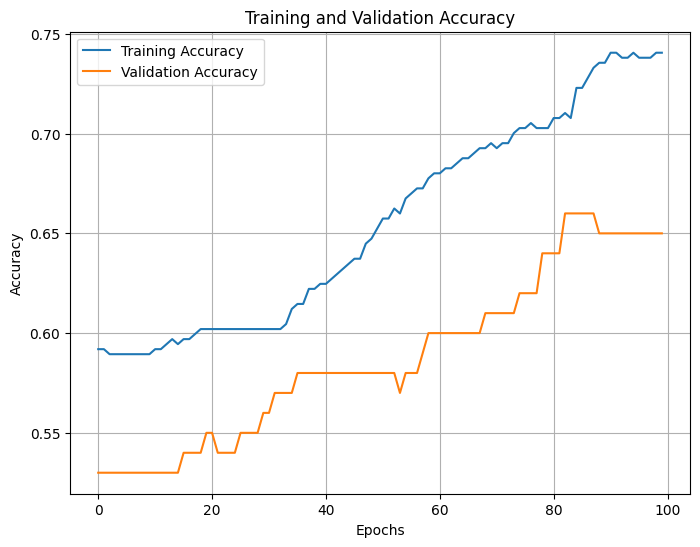

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Dense(3, input_shape=(X_train.shape[1],), activation='softmax')  # 3 output classes
])
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

using different hyperparameters and evaluating results

In [ ]:
def train_with_learning_rate(learning_rate):
    model = Sequential([
        Dense(3, input_shape=(X_train.shape[1],), activation='softmax')
    ])
    model.compile(
        optimizer=SGD(learning_rate=learning_rate),
        loss=SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return test_accuracy

# Compare different learning rates
learning_rates = [0.001, 0.01, 0.1]
results = {lr: train_with_learning_rate(lr) for lr in learning_rates}
print("Test Accuracy for different learning rates:", results)

Test Accuracy for different learning rates: {0.001: 0.5299999713897705, 0.01: 0.6499999761581421, 0.1: 0.7599999904632568}


 Performance Comparison with Random Forest

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Logistic Regression Metrics: {'Accuracy': 0.65, 'Precision': 0.5699125789218067, 'Recall': 0.65, 'F1 Score': 0.5982649071358749}
Random Forest Metrics: {'Accuracy': 0.79, 'Precision': 0.795939393939394, 'Recall': 0.79, 'F1 Score': 0.7871808701905789}

Logistic Regression Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.92      0.79        53
         Low       0.00      0.00      0.00        10
      Medium       0.55      0.43      0.48        37

    accuracy                           0.65       100
   macro avg       0.41      0.45      0.43       100
weighted avg       0.57      0.65      0.60       100


Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.85      0.87        53
         Low       0.67      0.40      0.50        10
      Medium       0.68      0.81      0.74        37

    accuracy                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

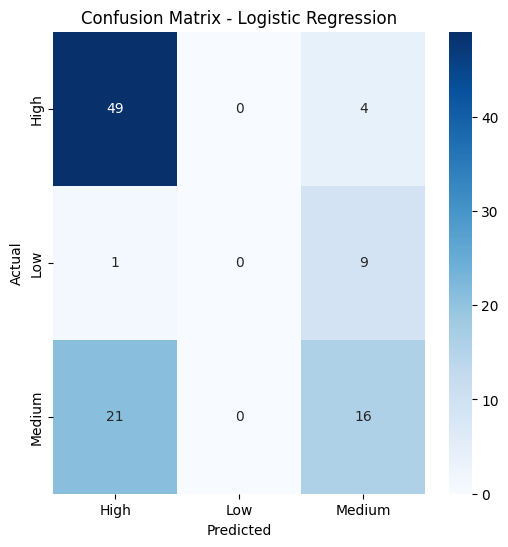

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest classifier for comparison
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using both models
y_pred_logistic = model.predict(X_test)
y_pred_logistic = y_pred_logistic.argmax(axis=1)  # Get class with highest probability
y_pred_rf = rf_model.predict(X_test)

# Compute evaluation metrics for both models
logistic_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic, average='weighted'),
    'Recall': recall_score(y_test, y_pred_logistic, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_logistic, average='weighted')
}

rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_rf, average='weighted')
}

print("Logistic Regression Metrics:", logistic_metrics)
print("Random Forest Metrics:", rf_metrics)

# Print detailed classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic, target_names=label_encoder.classes_))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Q6. fine tuning hyperparameters

In [ ]:
# Define a function to train and evaluate with different learning rates
def train_with_learning_rate(learning_rate):
    model = Sequential([
        Dense(3, input_shape=(X_train.shape[1],), activation='softmax')
    ])
    model.compile(
        optimizer=SGD(learning_rate=learning_rate),
        loss=SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    return {
        'Learning Rate': learning_rate,
        'Test Loss': test_loss,
        'Test Accuracy': test_accuracy,
        'Training History': history
    }

# Test with a range of learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
results = [train_with_learning_rate(lr) for lr in learning_rates]

# Display results
for res in results:
    print(f"Learning Rate: {res['Learning Rate']}, Test Loss: {res['Test Loss']}, Test Accuracy: {res['Test Accuracy']}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning Rate: 0.001, Test Loss: 0.923647940158844, Test Accuracy: 0.5699999928474426
Learning Rate: 0.01, Test Loss: 0.7292422652244568, Test Accuracy: 0.6700000166893005
Learning Rate: 0.1, Test Loss: 0.587696373462677, Test Accuracy: 0.7699999809265137
Learning Rate: 0.5, Test Loss: 0.5175538659095764, Test Accuracy: 0.7599999904632568


0.1 is best on the basis of accuracy


grid/random search

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example: Hyperparameter tuning for Random Forest using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.8135126582278481


Q7

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the model (e.g., Random Forest or Scikit-Learn Logistic Regression)
rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)  # Use tuned hyperparameters

# Perform 5-fold cross-validation and calculate the average metrics
accuracy_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(rf_model, X, y, cv=5, scoring='precision_weighted')
recall_scores = cross_val_score(rf_model, X, y, cv=5, scoring='recall_weighted')
f1_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')

print(f"Average Accuracy: {accuracy_scores.mean()}")
print(f"Average Precision: {precision_scores.mean()}")
print(f"Average Recall: {recall_scores.mean()}")
print(f"Average F1-Score: {f1_scores.mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Average Accuracy: 0.7468080808080808
Average Precision: 0.7385480615589112
Average Recall: 0.7468080808080808
Average F1-Score: 0.7196958280701254


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = rf_model.predict_proba(X_test)

# Calculate AUC-ROC score for each class and average them
auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"Random Forest AUC-ROC Score: {auc_score}")


Random Forest AUC-ROC Score: 0.9066466569798565
